In [1]:
import numpy as np
import matplotlib.pyplot as plt

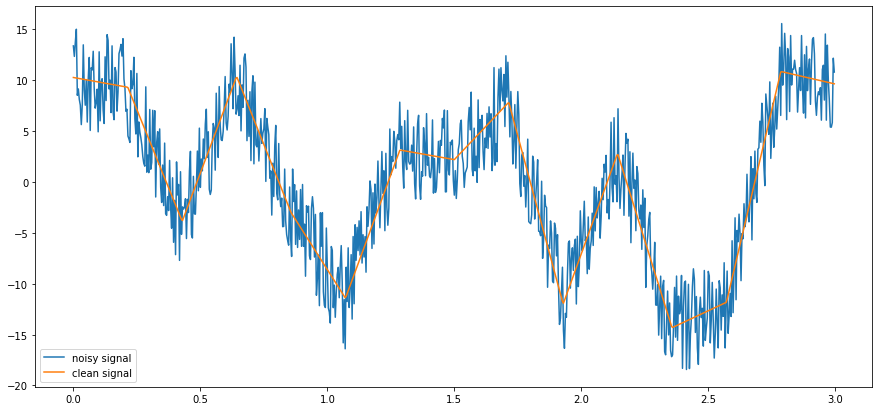

In [23]:
# Creating signal

sampling_rate = 256
time = np.arange(0, 3, 1 / sampling_rate)  # 256 * 3 seconds
n_interpolation_pole = 15  # real number of data points before interpolation
n_data = len(time)  # number of data points after interpolation
data_amplitude = 30
noise_amplitude = 5

clean_signal = np.random.random(n_interpolation_pole) * data_amplitude
clean_signal = np.interp(time, np.linspace(0, 3, n_interpolation_pole), clean_signal)
noise = np.random.uniform(-1, 1, n_data) * noise_amplitude
noisy_signal = clean_signal + noise
# Subtract mean to eliminate DC
noisy_signal -= np.mean(noisy_signal)

plt.figure(figsize=(15, 7))
plt.plot(time, noisy_signal, label='noisy signal')
plt.plot(time, clean_signal-np.mean(clean_signal), label='clean signal')
plt.legend()


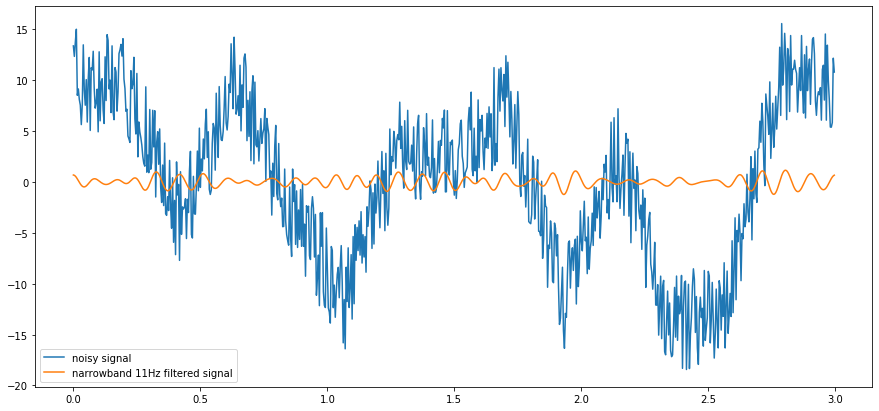

In [29]:
# Creating Gaussian window in FREQUENCY DOMAIN
hz = np.linspace(0, sampling_rate, n_data)

full_width_half_maximum = 5.2  # ms, influences width of the 'bell' shape
peak = 11  # 11 Hz

s = full_width_half_maximum * (2 * np.pi - 1) / (4 * np.pi)
x = hz - peak
gaussian_window = np.exp(-0.5 * (x / s) ** 2)

noisy_signal_fft = np.fft.fft(noisy_signal)
# ifft doesn't return a real value because gaussian  window is not mirrored for higher frequencies
# that's why np.real is used
convoluted_signal = 2 * np.real(np.fft.ifft(noisy_signal_fft * gaussian_window))

plt.figure(figsize=(15, 7))
plt.plot(time, noisy_signal, label='noisy signal')
plt.plot(time, convoluted_signal, label='narrowband {0}Hz filtered signal'.format(peak))
plt.legend()


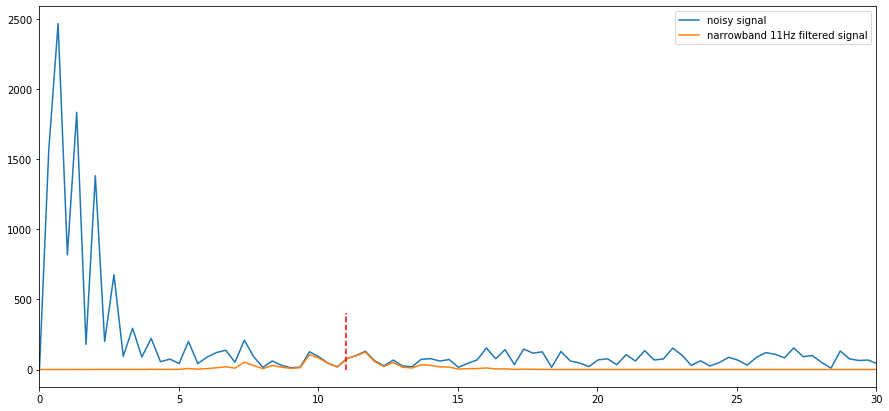

In [49]:
noisy_signal_power = abs(noisy_signal_fft)
convoluted_signal_power = abs(noisy_signal_fft * gaussian_window)

plt.figure(figsize=(15, 7))
plt.plot(hz, noisy_signal_power, label='noisy signal')
plt.plot(hz, convoluted_signal_power, label='narrowband {0}Hz filtered signal'.format(peak))
plt.xlim([0, 30])
plt.plot([peak, peak], [0, 400], 'r--')
plt.legend()
